In [1]:
import pandas as pd
df = pd.read_csv(r'/Users/keerthika/Downloads/train.csv')
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [2]:
df.shape

(22083, 45)

In [3]:
df.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [4]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [5]:
for i in df.select_dtypes(include="number").columns:
    df[i]=imputer.fit_transform(df[[i]]) 

In [6]:
df.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [7]:
for i in ["Inherited from father","Maternal gene","Family Name","Institute Name","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Parental consent","Follow-up","Gender","Birth asphyxia","Autopsy shows birth defect (if applicable)","Place of birth","Folic acid details (peri-conceptional)","H/O serious maternal illness","H/O radiation exposure (x-ray)","H/O substance abuse","Assisted conception IVF/ART","History of anomalies in previous pregnancies","Birth defects","Blood test result","Genetic Disorder","Disorder Subclass"]:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

Patient Id                                          0
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Patient First Name                                  0
Family Name                                         0
Father's name                                       0
Mother's age                                        0
Father's age                                        0
Institute Name                                      0
Location of Institute                               0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                      

In [9]:
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,Smith,Larre,...,Singular,9.857562,slightly abnormal,1.0,1.000000,1.0,1.0,1.000000,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,Smith,Brycen,...,Multiple,5.522560,normal,1.0,0.551886,1.0,1.0,0.000000,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,Smith,Nashon,...,Singular,7.486224,normal,0.0,1.000000,1.0,1.0,1.000000,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.000000,1.0,0.0,0.000000,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,Yes,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,slightly abnormal,0.0,0.000000,0.0,0.0,0.461917,Multifactorial genetic inheritance disorders,Cancer


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Genetic Disorder', axis=1)
y = df['Genetic Disorder'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

common_columns = list(set(X_train_encoded.columns).intersection(X_test_encoded.columns))
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_encoded, y_train)

X_test_array = X_test_encoded.values

y_pred = knn_classifier.predict(X_test_array)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.5702965813900838
Classification Report:
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.60      0.81      0.69      2485
Multifactorial genetic inheritance disorders       0.38      0.09      0.15       433
            Single-gene inheritance diseases       0.47      0.31      0.37      1499

                                    accuracy                           0.57      4417
                                   macro avg       0.48      0.40      0.40      4417
                                weighted avg       0.54      0.57      0.53      4417



In [18]:
selected_columns = [
    'Patient Id', 'Patient Age', 'Genes in mother\'s side', 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
    'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min','Test 1','Test 2','Test 3','Test 4','Test 5', 'Parental consent', 
    'Follow-up', 'Gender', 'Birth asphyxia','Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness',
    'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'No. of previous abortion', 'Birth defects', 'White Blood cell count (thousand per microliter)',
    'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3','Symptom 4','Symptom 5'
]

df_selected = df[selected_columns]
df_selected.shape

(22083, 35)

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df_selected 
y = df['Genetic Disorder'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

common_columns = list(set(X_train_encoded.columns).intersection(X_test_encoded.columns))
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_encoded, y_train)

X_test_array = X_test_encoded.values

y_pred = knn_classifier.predict(X_test_array)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


/Users/keerthika/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.5103011093502378
Classification Report:
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.57      0.75      0.65      2485
Multifactorial genetic inheritance disorders       0.25      0.08      0.12       433
            Single-gene inheritance diseases       0.35      0.23      0.28      1499

                                    accuracy                           0.51      4417
                                   macro avg       0.39      0.35      0.35      4417
                                weighted avg       0.46      0.51      0.47      4417



In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(['Genetic Disorder', 'Disorder Subclass'], axis=1) 
y = df[['Genetic Disorder', 'Disorder Subclass']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

common_columns = list(set(X_train_encoded.columns).intersection(X_test_encoded.columns))
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]

X_train_array = X_train_encoded.to_numpy()
X_test_array = X_test_encoded.to_numpy()

knn_classifier = KNeighborsClassifier(n_neighbors=5)
multi_output_classifier = MultiOutputClassifier(knn_classifier, n_jobs=-1)
multi_output_classifier.fit(X_train_array, y_train)

y_pred = multi_output_classifier.predict(X_test_array)

accuracies = []
for i in range(len(y_test.columns)):
    target_variable = y_test.columns[i]
    accuracy = accuracy_score(y_test[target_variable], y_pred[:, i])
    accuracies.append(accuracy)
    print(f"Accuracy for {target_variable}: {accuracy}")

mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy: {mean_accuracy}")


Accuracy for Genetic Disorder: 0.5059995472039847
Accuracy for Disorder Subclass: 0.24654743038261262
Mean Accuracy: 0.37627348879329864


Accuracy: 0.5702965813900838
Classification Report:
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.60      0.81      0.69      2485
Multifactorial genetic inheritance disorders       0.38      0.09      0.15       433
            Single-gene inheritance diseases       0.47      0.31      0.37      1499

                                    accuracy                           0.57      4417
                                   macro avg       0.48      0.40      0.40      4417
                                weighted avg       0.54      0.57      0.53      4417



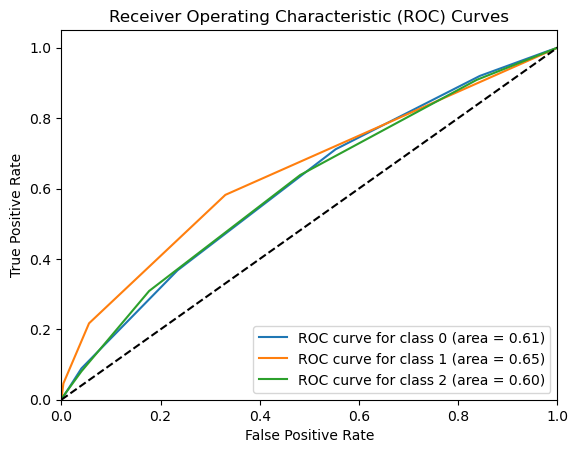

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the data
X = df.drop('Genetic Disorder', axis=1)
y = df['Genetic Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the input features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure the columns are consistent between training and testing sets
common_columns = list(set(X_train_encoded.columns).intersection(X_test_encoded.columns))
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_encoded, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test_encoded)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute predicted probabilities
y_prob = knn_classifier.predict_proba(X_test_encoded)

# Binarize the output labels for ROC curve computation
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Plot ROC curves
plt.figure()
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()
